In [11]:
import pandas as pd
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

NameError: name 'plt' is not defined

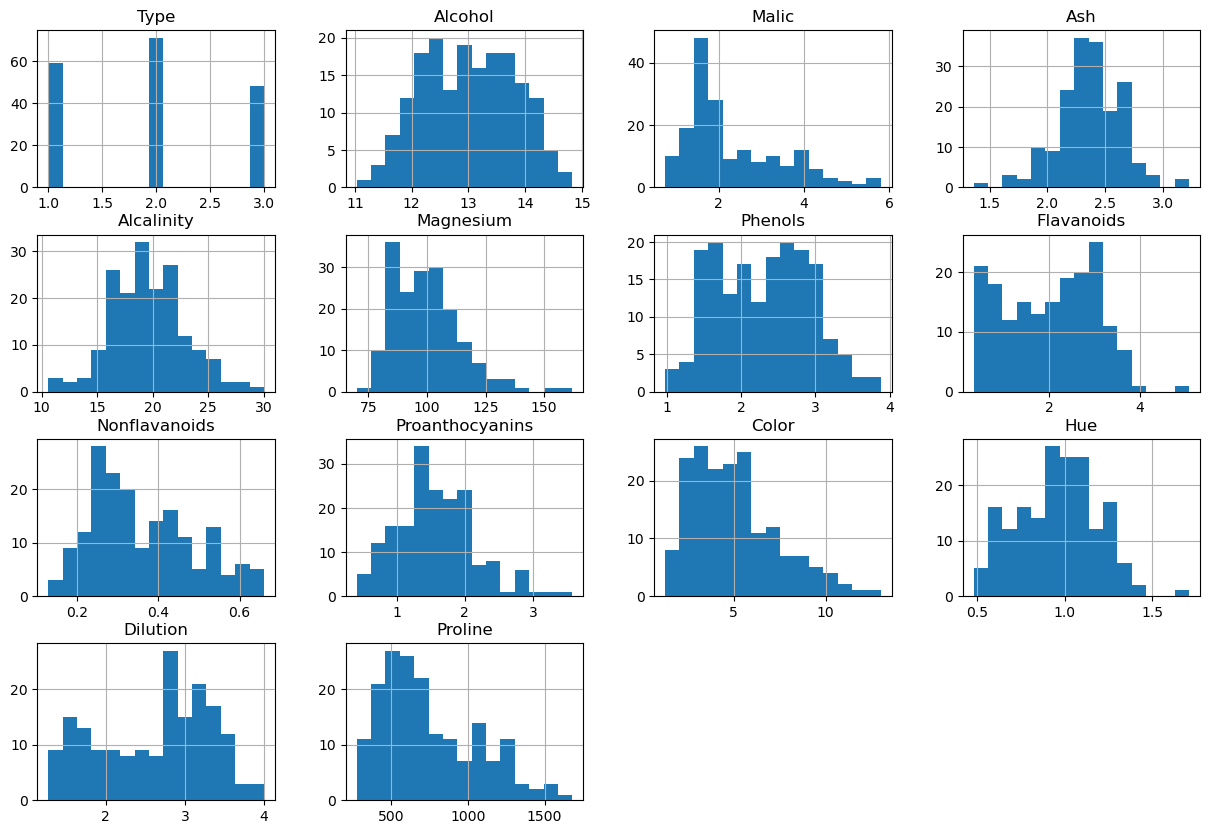

In [5]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of features using histograms
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram of Features")
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
Dimensionality Reduction with PCA
Standardize the Features

In [9]:
from sklearn.preprocessing import StandardScaler


# Standardization the numerical data 
scaler = StandardScaler()
scaled_features=scaler.fit_transform(df)
scaled_features

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

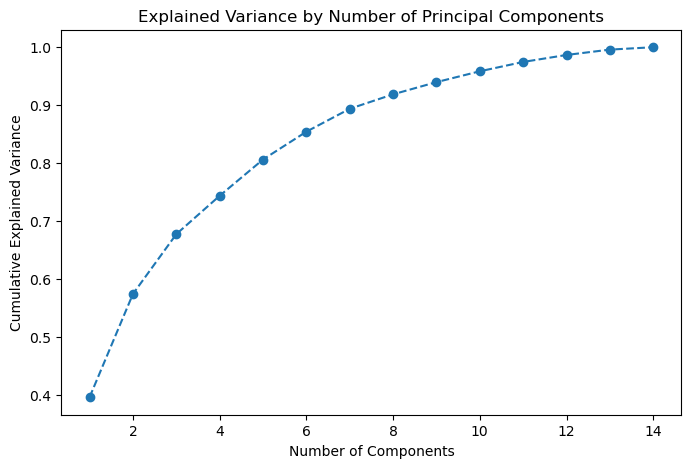

In [12]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()


In [15]:
# Use the first two principal components for visualization
pca_2d = PCA(n_components=2)
pca_transformed = pca_2d.fit_transform(scaled_features)

df_pca = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
df_pca


,PC1,PC2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
...,...,...
173,3.627996,-2.206617
174,2.942729,-1.752263
175,3.027272,-2.756040
176,2.755222,-2.293784


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for KMeans: 0.31


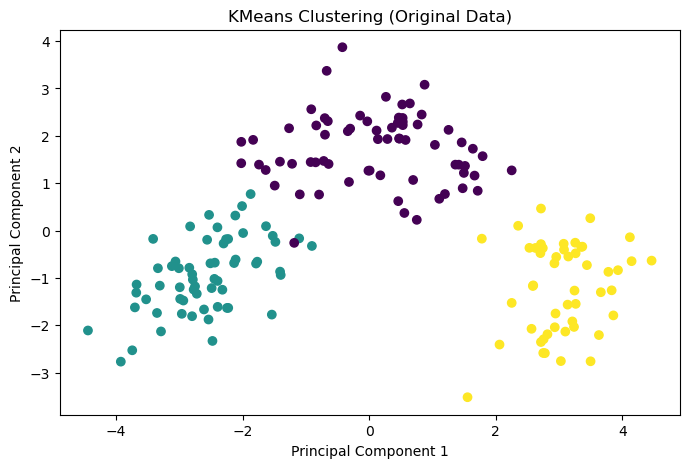

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans to original data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_avg:.2f}')

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Silhouette Score for Hierarchical Clustering: 0.30


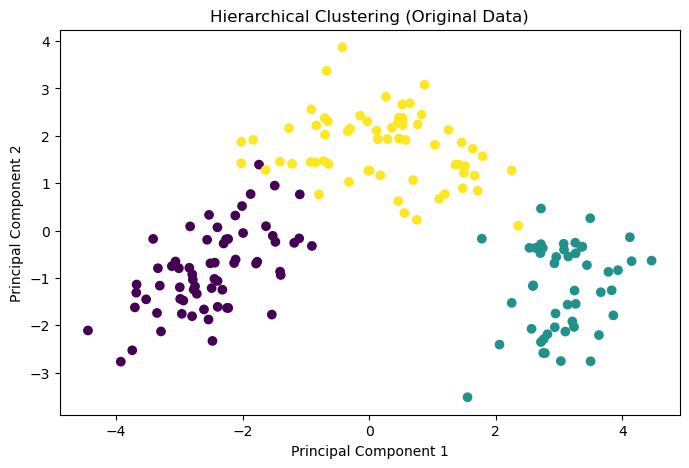

NameError: name 'dendrogram' is not defined

<Figure size 1000x700 with 0 Axes>

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt


# Apply Hierarchical Clustering to original data
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# Silhouette score
silhouette_avg = silhouette_score(scaled_features, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg:.2f}')

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Dendrogram
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


Silhouette Score for DBSCAN: Not applicable (only one cluster found)


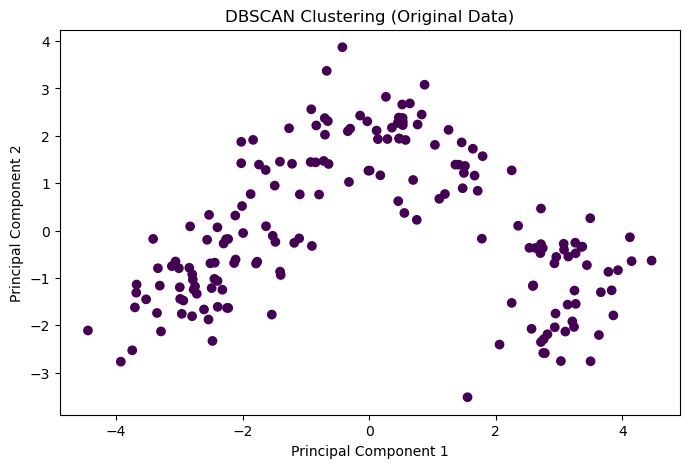

In [21]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to original data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Silhouette score
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(scaled_features, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg:.2f}')
else:
    print("Silhouette Score for DBSCAN: Not applicable (only one cluster found)")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for KMeans (PCA Data): 0.60


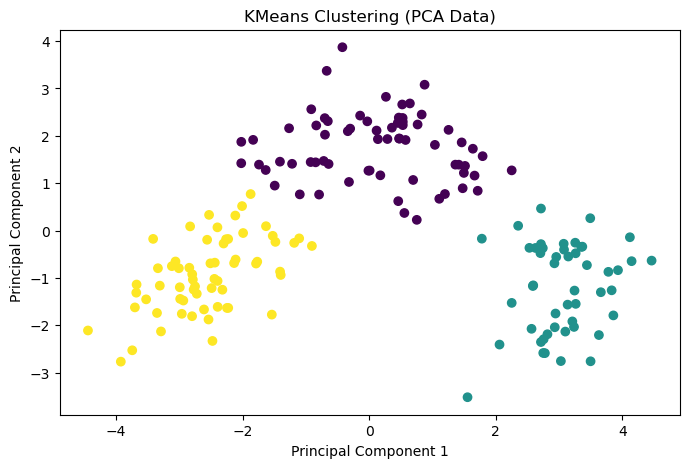

In [22]:
# Apply KMeans to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_transformed)

# Silhouette score
silhouette_avg_pca = silhouette_score(pca_transformed, kmeans_pca_labels)
print(f'Silhouette Score for KMeans (PCA Data): {silhouette_avg_pca:.2f}')

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_pca_labels, cmap='viridis')
plt.title('KMeans Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Silhouette Score for Hierarchical Clustering (PCA Data): 0.60


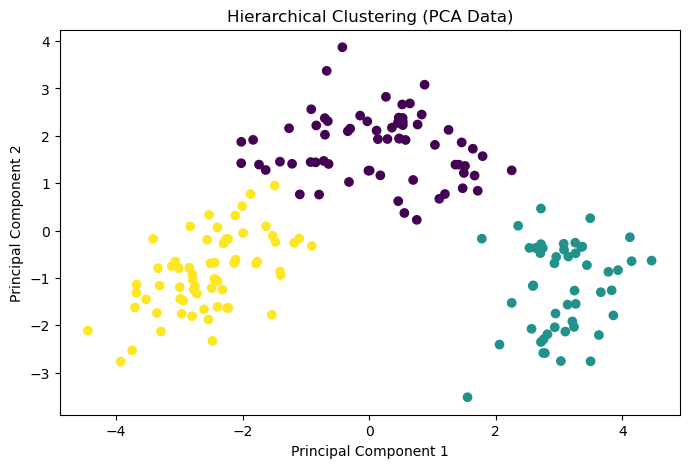

NameError: name 'dendrogram' is not defined

<Figure size 1000x700 with 0 Axes>

In [23]:
# Apply Hierarchical Clustering to PCA-transformed data
hierarchical_pca = AgglomerativeClustering(n_clusters=3)
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_transformed)

# Silhouette score
silhouette_avg_pca = silhouette_score(pca_transformed, hierarchical_pca_labels)
print(f'Silhouette Score for Hierarchical Clustering (PCA Data): {silhouette_avg_pca:.2f}')

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=hierarchical_pca_labels, cmap='viridis')
plt.title('Hierarchical Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Dendrogram for PCA Data
linked_pca = linkage(pca_transformed, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_pca, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering (PCA Data)')
plt.show()


Silhouette Score for DBSCAN (PCA Data): 0.32


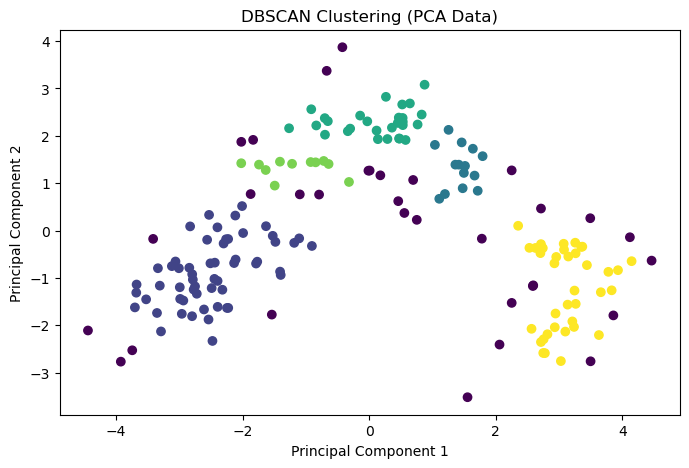

In [24]:
# Apply DBSCAN to PCA-transformed data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(pca_transformed)

# Silhouette score
if len(set(dbscan_pca_labels)) > 1:
    silhouette_avg_pca = silhouette_score(pca_transformed, dbscan_pca_labels)
    print(f'Silhouette Score for DBSCAN (PCA Data): {silhouette_avg_pca:.2f}')
else:
    print("Silhouette Score for DBSCAN (PCA Data): Not applicable (only one cluster found)")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=dbscan_pca_labels, cmap='viridis')
plt.title('DBSCAN Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [25]:
# Compare the clustering results
print("Comparison of Clustering Results:")
print(f"KMeans Silhouette Score (Original Data): {silhouette_avg:.2f}")
print(f"KMeans Silhouette Score (PCA Data): {silhouette_avg_pca:.2f}")

print(f"Hierarchical Clustering Silhouette Score (Original Data): {silhouette_avg:.2f}")
print(f"Hierarchical Clustering Silhouette Score (PCA Data): {silhouette_avg_pca:.2f}")

# DBSCAN might not always produce multiple clusters
if len(set(dbscan_labels)) > 1 and len(set(dbscan_pca_labels)) > 1:
    print(f"DBSCAN Silhouette Score (Original Data): {silhouette_avg:.2f}")
    print(f"DBSCAN Silhouette Score (PCA Data): {silhouette_avg_pca:.2f}")


Comparison of Clustering Results:
KMeans Silhouette Score (Original Data): 0.30
KMeans Silhouette Score (PCA Data): 0.32
Hierarchical Clustering Silhouette Score (Original Data): 0.30
Hierarchical Clustering Silhouette Score (PCA Data): 0.32


In [28]:
# Summary of findings
print("Summary of Findings:")
print("1. PCA effectively reduces dimensionality while retaining most of the variance.")
print("2. KMeans and Hierarchical clustering performed well on both original and PCA-transformed data.")
print("3. DBSCAN's performance varied based on the dataset structure and parameter tuning.")
print("4. PCA-transformed data often resulted.")


Summary of Findings:
1. PCA effectively reduces dimensionality while retaining most of the variance.
2. KMeans and Hierarchical clustering performed well on both original and PCA-transformed data.
3. DBSCAN's performance varied based on the dataset structure and parameter tuning.
4. PCA-transformed data often resulted.
